In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 4.3 MB/s 
     |████████████████████████████████| 163 kB 54.1 MB/s 
     |████████████████████████████████| 7.6 MB 22.0 MB/s 


In [ ]:
import torch

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
from textblob import Word
from collections import Counter
import wordcloud
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pickle

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [ ]:
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.metrics import recall_score, precision_score,accuracy_score,confusion_matrix,f1_score

In [ ]:
df = pd.read_csv('/content/cryto-data.csv')
df

,Unnamed: 0,uncleaned tweet,name,created_at,favorite_count,screen_name,source,retweet_count,clean tweet,polarity,Subjectivity,sentiment
0,0,RT @MetaBeatOffl: QUIZ TIME on today's #MORNIN...,ImDahDude,2022-09-10 13:33:05,80.0,DahDude22,Twitter Web App,5.0,quiz time todays morningbeat metabeats token h...,0.000000,0.00,neutral
1,1,RT @GGslayerstudios: 📣Massive #Giveaway❤️‍🔥\n\...,👏SanjayVaghri👏,2022-09-10 13:33:04,3547.0,sanjay_vaghri,Twitter Web App,992.0,massive giveaway reward pool tokens worth 5000...,0.550000,0.25,positive
2,2,Current #Cardano price Alert: \n\n#ADA $0.52 U...,Cardano Tracker,2022-09-10 13:33:03,2.0,CardanoTracker,Twitter Web App,0.0,current cardano price ale052 usd bitcoin 24437...,0.000000,0.40,neutral
3,3,RT @evai_io: What’s in it for me?🤔\n\nRewardin...,godfrey™,2022-09-10 13:33:01,184359.0,godfrey_G_,AiSpaceBot,3.0,whats rewarding evai community members paevai ...,0.000000,0.00,neutral
4,4,RT @CLOCKMENNFT: Join us in revolutionizing we...,rul,2022-09-10 13:33:01,6600.0,bromenangbro,Twitter for Android,801.0,join revolutionizing web3 partnerships discove...,0.600000,0.90,positive
...,...,...,...,...,...,...,...,...,...,...,...,...
7643,7643,RT @MattWallace888: Elon Musk announcing Tesla...,Alex Gonzalez,2022-09-11 16:47:55,472.0,AlexGon71908134,Twitter for Android,2302.0,elon musk announcing tesla accepting dogecoin ...,0.400000,0.90,positive
7644,7644,I will fix google merchant cente̗r #suspension...,Kaiser GX,2022-09-11 16:47:47,10482.0,Kaiser_GX,Crawl_tweepy,0.0,fix google merchant center suspension misrepre...,-0.100000,0.10,negative
7645,7645,We all live with the objective of being happy;...,OwnerOfGMT,2022-09-11 16:47:12,210.0,Ownerofgmt,OwnerOfGMT,0.0,live objective happy lives different anne frank,0.136364,0.50,positive
7646,7646,"RT @TheDogeBird: Hey, @elonmusk, can we borrow...",Booth Tyler,2022-09-11 16:47:06,35.0,BoothTyler4,Twitter Web App,4.0,hey borrow piece land day thoughts event,0.000000,0.00,neutral


In [ ]:
df.dropna()

,Unnamed: 0,uncleaned tweet,name,created_at,favorite_count,screen_name,source,retweet_count,clean tweet,polarity,Subjectivity,sentiment
0,0,RT @MetaBeatOffl: QUIZ TIME on today's #MORNIN...,ImDahDude,2022-09-10 13:33:05,80.0,DahDude22,Twitter Web App,5.0,quiz time todays morningbeat metabeats token h...,0.000000,0.00,neutral
1,1,RT @GGslayerstudios: 📣Massive #Giveaway❤️‍🔥\n\...,👏SanjayVaghri👏,2022-09-10 13:33:04,3547.0,sanjay_vaghri,Twitter Web App,992.0,massive giveaway reward pool tokens worth 5000...,0.550000,0.25,positive
2,2,Current #Cardano price Alert: \n\n#ADA $0.52 U...,Cardano Tracker,2022-09-10 13:33:03,2.0,CardanoTracker,Twitter Web App,0.0,current cardano price ale052 usd bitcoin 24437...,0.000000,0.40,neutral
3,3,RT @evai_io: What’s in it for me?🤔\n\nRewardin...,godfrey™,2022-09-10 13:33:01,184359.0,godfrey_G_,AiSpaceBot,3.0,whats rewarding evai community members paevai ...,0.000000,0.00,neutral
4,4,RT @CLOCKMENNFT: Join us in revolutionizing we...,rul,2022-09-10 13:33:01,6600.0,bromenangbro,Twitter for Android,801.0,join revolutionizing web3 partnerships discove...,0.600000,0.90,positive
...,...,...,...,...,...,...,...,...,...,...,...,...
7643,7643,RT @MattWallace888: Elon Musk announcing Tesla...,Alex Gonzalez,2022-09-11 16:47:55,472.0,AlexGon71908134,Twitter for Android,2302.0,elon musk announcing tesla accepting dogecoin ...,0.400000,0.90,positive
7644,7644,I will fix google merchant cente̗r #suspension...,Kaiser GX,2022-09-11 16:47:47,10482.0,Kaiser_GX,Crawl_tweepy,0.0,fix google merchant center suspension misrepre...,-0.100000,0.10,negative
7645,7645,We all live with the objective of being happy;...,OwnerOfGMT,2022-09-11 16:47:12,210.0,Ownerofgmt,OwnerOfGMT,0.0,live objective happy lives different anne frank,0.136364,0.50,positive
7646,7646,"RT @TheDogeBird: Hey, @elonmusk, can we borrow...",Booth Tyler,2022-09-11 16:47:06,35.0,BoothTyler4,Twitter Web App,4.0,hey borrow piece land day thoughts event,0.000000,0.00,neutral


In [ ]:
df1 = df[['clean tweet','sentiment']]
df1

,clean tweet,sentiment
0,quiz time todays morningbeat metabeats token h...,neutral
1,massive giveaway reward pool tokens worth 5000...,positive
2,current cardano price ale052 usd bitcoin 24437...,neutral
3,whats rewarding evai community members paevai ...,neutral
4,join revolutionizing web3 partnerships discove...,positive
...,...,...
7643,elon musk announcing tesla accepting dogecoin ...,positive
7644,fix google merchant center suspension misrepre...,negative
7645,live objective happy lives different anne frank,positive
7646,hey borrow piece land day thoughts event,neutral


In [ ]:
df2 = df1.dropna()
df2

,clean tweet,sentiment
0,quiz time todays morningbeat metabeats token h...,neutral
1,massive giveaway reward pool tokens worth 5000...,positive
2,current cardano price ale052 usd bitcoin 24437...,neutral
3,whats rewarding evai community members paevai ...,neutral
4,join revolutionizing web3 partnerships discove...,positive
...,...,...
7643,elon musk announcing tesla accepting dogecoin ...,positive
7644,fix google merchant center suspension misrepre...,negative
7645,live objective happy lives different anne frank,positive
7646,hey borrow piece land day thoughts event,neutral


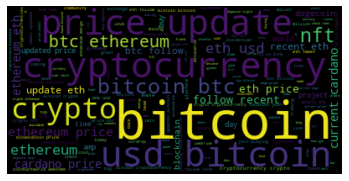

In [ ]:
common_words=''
tweets = list(df2['clean tweet'])
for i in tweets:
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens)+" "
wordcloud_list = wordcloud.WordCloud().generate(common_words)
plt.imshow(wordcloud_list, interpolation='bilinear')
plt.axis("off")
plt.show()

##Sentimental Analysis - SVM 

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
trainData,testData = train_test_split(df2,test_size=0.3)

In [ ]:
train_vectors = vectorizer.fit_transform(trainData['clean tweet'])
test_vectors = vectorizer.transform(testData['clean tweet'])

In [ ]:
classifier_linear = svm.SVC(kernel='linear')

In [ ]:
classifier_linear.fit(train_vectors, trainData['sentiment'])

SVC(kernel='linear')

In [ ]:
prediction_linear = classifier_linear.predict(test_vectors)

In [ ]:
classification_report(testData['sentiment'], prediction_linear, output_dict=True)

{'negative': {'precision': 0.9666666666666667,
  'recall': 0.5471698113207547,
  'f1-score': 0.6987951807228916,
  'support': 159},
 'neutral': {'precision': 0.9118442401297999,
  'recall': 0.9952774498229043,
  'f1-score': 0.951735817104149,
  'support': 1694},
 'positive': {'precision': 0.9550561797752809,
  'recall': 0.7692307692307693,
  'f1-score': 0.8521303258145364,
  'support': 442},
 'accuracy': 0.9206971677559913,
 'macro avg': {'precision': 0.9445223621905825,
  'recall': 0.7705593434581428,
  'f1-score': 0.834220441213859,
  'support': 2295},
 'weighted avg': {'precision': 0.923964694658194,
  'recall': 0.9206971677559913,
  'f1-score': 0.9150285454986464,
  'support': 2295}}

In [ ]:
recall_score(testData['sentiment'].values, prediction_linear,average='weighted')

0.9206971677559913

In [ ]:
precision_score(testData['sentiment'].values, prediction_linear,average='weighted')

0.923964694658194

In [ ]:
f1_score(testData['sentiment'].values, prediction_linear,average='weighted')

0.9150285454986464

In [ ]:
accuracy_score(testData['sentiment'].values, prediction_linear)

0.9206971677559913

In [ ]:
confusion_matrix(testData['sentiment'].values, prediction_linear)

array([[  87,   63,    9],
       [   1, 1686,    7],
       [   2,  100,  340]])

##Sentimental Analysis - Naive Bayes Classifier

In [ ]:
vec = CountVectorizer()

In [ ]:
train_vector_1 = vec.fit_transform(trainData['clean tweet']).toarray()
test_vector_1 = vec.transform(testData['clean tweet']).toarray()

In [ ]:
model = MultinomialNB()

In [ ]:
model.fit(train_vector_1, trainData['sentiment'])

MultinomialNB()

In [ ]:
prediction_1 = model.predict(test_vector_1)

In [ ]:
classification_report(testData['sentiment'], prediction_1, output_dict=True)

{'negative': {'precision': 0.8548387096774194,
  'recall': 0.3333333333333333,
  'f1-score': 0.47963800904977366,
  'support': 159},
 'neutral': {'precision': 0.8935108153078203,
  'recall': 0.9510035419126328,
  'f1-score': 0.9213611667143266,
  'support': 1694},
 'positive': {'precision': 0.7488372093023256,
  'recall': 0.7285067873303167,
  'f1-score': 0.7385321100917431,
  'support': 442},
 'accuracy': 0.865359477124183,
 'macro avg': {'precision': 0.8323955780958551,
  'recall': 0.6709478875254277,
  'f1-score': 0.7131770952852811,
  'support': 2295},
 'weighted avg': {'precision': 0.8629685065280109,
  'recall': 0.865359477124183,
  'f1-score': 0.8555466024024111,
  'support': 2295}}

In [ ]:
recall_score(testData['sentiment'].values, prediction_1,average='weighted')

0.865359477124183

In [ ]:
precision_score(testData['sentiment'].values, prediction_1,average='weighted')

0.8629685065280109

In [ ]:
f1_score(testData['sentiment'].values, prediction_1,average='weighted')

0.8555466024024111

In [ ]:
accuracy_score(testData['sentiment'].values, prediction_1)

0.865359477124183

In [ ]:
confusion_matrix(testData['sentiment'].values, prediction_1)

array([[  53,   75,   31],
       [   6, 1611,   77],
       [   3,  117,  322]])

## - Decision Tree

```
# Uses Bag of words feature
```



Decision Tree - Bag of words feature

In [ ]:
dct = DecisionTreeClassifier(criterion='entropy', random_state=1)

In [ ]:
dct.fit(train_vectors, trainData['sentiment'])

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [ ]:
pred_class = dct.predict(test_vectors)

In [ ]:
print(classification_report(testData['sentiment'], pred_class))

{'negative': {'precision': 0.8947368421052632,
  'recall': 0.7484276729559748,
  'f1-score': 0.815068493150685,
  'support': 159},
 'neutral': {'precision': 0.9588100686498856,
  'recall': 0.9893742621015348,
  'f1-score': 0.9738524113887275,
  'support': 1694},
 'positive': {'precision': 0.9396135265700483,
  'recall': 0.8800904977375565,
  'f1-score': 0.9088785046728971,
  'support': 442},
 'accuracy': 0.9516339869281045,
 'macro avg': {'precision': 0.931053479108399,
  'recall': 0.8726308109316886,
  'f1-score': 0.8992664697374364,
  'support': 2295},
 'weighted avg': {'precision': 0.950673896702224,
  'recall': 0.9516339869281045,
  'f1-score': 0.9503382023393829,
  'support': 2295}}

In [ ]:
recall_score(testData['sentiment'].values, prediction_1,average='weighted')

0.865359477124183

In [ ]:
precision_score(testData['sentiment'].values, prediction_1,average='weighted')

0.8629685065280109

In [ ]:
f1_score(testData['sentiment'].values, prediction_1,average='weighted')

0.8555466024024111

In [ ]:
accuracy_score(testData['sentiment'].values, pred_class)

0.9516339869281045

In [ ]:
confusion_matrix(testData['sentiment'].values, pred_class)

array([[ 119,   26,   14],
       [   7, 1676,   11],
       [   7,   46,  389]])

Pickling the vectorizer

In [ ]:
'''pickle.dump(vectorizer, open('models/tfid-vectorizer.sav', 'wb'))


pickle.dump(vec, open('models/count-vectorizer.sav', 'wb'))'''

"pickle.dump(vectorizer, open('models/tfid-vectorizer.sav', 'wb'))\n\n\npickle.dump(vec, open('models/count-vectorizer.sav', 'wb'))"

##LSTM

In [ ]:
# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cpu



In [ ]:
tokenizer = Tokenizer( split=' ') 
tokenizer.fit_on_texts(df2['clean tweet'].values)
X = tokenizer.texts_to_sequences(df2['clean tweet'].values)
X = pad_sequences(X)

In [ ]:
X.shape

(7647, 20)

In [ ]:
model1 = Sequential()
model1.add(Embedding(15000, 64, input_length = X.shape[1] ))
model1.add(SpatialDropout1D(0.4))
model1.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model1.add(Dense(3,activation='softmax'))
model1.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 64)            960000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 20, 64)           0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 176)               169664    
                                                                 
 dense (Dense)               (None, 3)                 531       
                                                                 
Total params: 1,130,195
Trainable params: 1,130,195
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
y=pd.get_dummies(df2['sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.35, random_state = 42)
X.shape

(7647, 20)

In [ ]:
X_train.shape


(4970, 20)

In [ ]:
y_train.shape

(4970, 3)

In [ ]:
batch_size=32
model1.fit(X_train, y_train, epochs = 10, batch_size=batch_size, )

Epoch 1/10
156/156 [==============================] - 28s 128ms/step - loss: 0.7146 - accuracy: 0.7342
Epoch 2/10
156/156 [==============================] - 17s 110ms/step - loss: 0.3849 - accuracy: 0.8676
Epoch 3/10
156/156 [==============================] - 14s 87ms/step - loss: 0.1809 - accuracy: 0.9320
Epoch 4/10
156/156 [==============================] - 15s 99ms/step - loss: 0.1026 - accuracy: 0.9668
Epoch 5/10
156/156 [==============================] - 14s 87ms/step - loss: 0.0590 - accuracy: 0.9837
Epoch 6/10
156/156 [==============================] - 15s 95ms/step - loss: 0.0347 - accuracy: 0.9907
Epoch 7/10
156/156 [==============================] - 14s 90ms/step - loss: 0.0206 - accuracy: 0.9950
Epoch 8/10
156/156 [==============================] - 17s 106ms/step - loss: 0.0117 - accuracy: 0.9980
Epoch 9/10
156/156 [==============================] - 15s 94ms/step - loss: 0.0144 - accuracy: 0.9976
Epoch 10/10
156/156 [==============================] - 14s 87ms/step - loss: 0.

In [ ]:
model1.evaluate(X_test,y_test)

84/84 [==============================] - 1s 12ms/step - loss: 0.4866 - accuracy: 0.9025


[0.4866143465042114, 0.9025027751922607]

#